# EDA - BCI Challenge

## Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

In [2]:
import sys
sys.path.append('../src/')

import utils

## Importing data

In [3]:
train = pd.read_csv('../data/input/train_data.csv')
test = pd.read_csv('../data/input/test_data.csv')

train_copy = train.copy()

## Summary

In [4]:
train_copy.head()

,id,mes,tipo_ban,tipo_seg,categoria,tipo_com,tipo_cat,tipo_cli,VAR1_sum,VAR1_prom,...,VAR27_sum,VAR27_prom,VAR27_trx,VAR28_sum,VAR28_prom,VAR28_trx,VAR29_prom,VAR29_ratio,VAR30_sum,target_mes
0,abdd0c8d3be5,202002,BAN1,NO PROD3,V5,COM4,RUBRO5,CLI1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,5b290c34ff68,202006,BAN1,PROD1,V2,COM2,RUBRO5,CLI1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17081.5,0.034,NaN,6.19
2,54b8678ab09b,201901,BAN1,PROD1/PROD2,V4,COM3,RUBRO3,CLI1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,706250.0,0.706,NaN,22.78
3,77e1b37ea594,202004,BAN1,NO PROD3,V6,COM4,RUBRO2,CLI1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7632694.0,0.954,NaN,55.06
4,7b6c7a3b57a9,202101,BAN1,PROD1,V2,COM2,RUBRO4,CLI2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,376664.0,0.443,70.0,0.19


In [5]:
train_copy.shape

(667691, 70)

### Missing values

Plotting missing values

In [6]:
df_missing_values = utils.dataframe_missing_values(train_copy)
df_missing_values_test = utils.dataframe_missing_values(test)

<AxesSubplot:title={'center':'TEST'}, xlabel='%'>

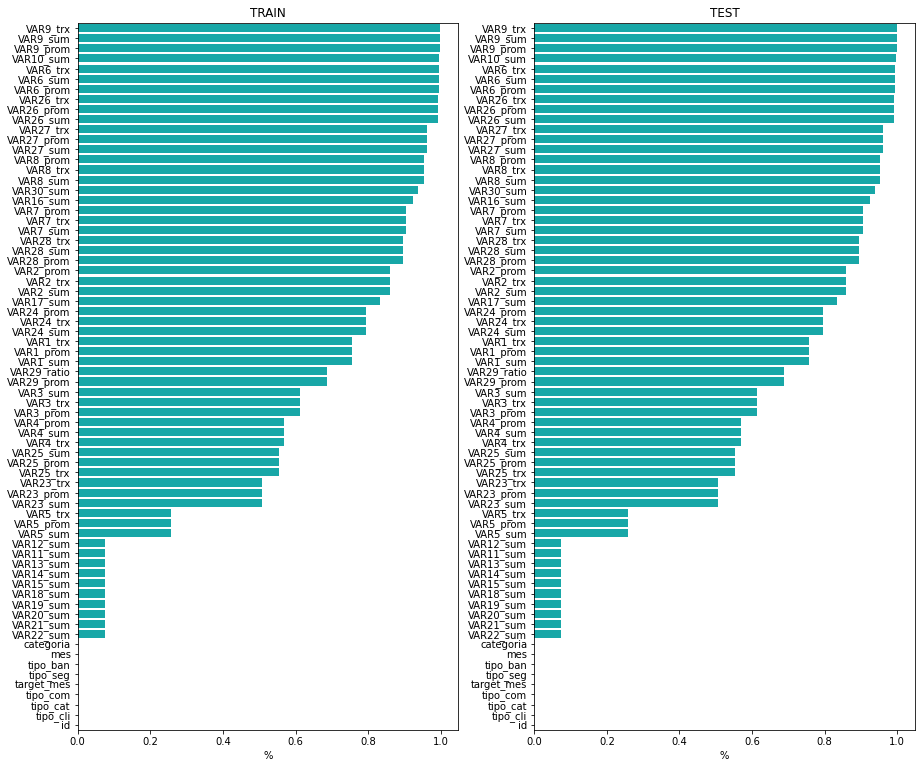

In [7]:
df_missing_values = utils.dataframe_missing_values(train_copy)
df_missing_values_test = utils.dataframe_missing_values(train_copy)

plt.figure(figsize=(15,13))

plt.subplot(1, 2, 1)
plt.title('TRAIN')
sns.barplot(x=df_missing_values['%'], 
            y=df_missing_values.index, 
            color='c', 
            order=df_missing_values.index[::-1])

plt.subplot(1, 2, 2)
plt.title('TEST')
sns.barplot(x=df_missing_values_test['%'], 
            y=df_missing_values_test.index, 
            color='c', 
            order=df_missing_values_test.index[::-1])

In [8]:
columns_most_nan_values = utils.get_columns_with_nan_values(train_copy, threshold=0.25)
print(columns_most_nan_values)

Index(['VAR5_sum', 'VAR5_prom', 'VAR5_trx', 'VAR23_sum', 'VAR23_prom',
       'VAR23_trx', 'VAR25_trx', 'VAR25_prom', 'VAR25_sum', 'VAR4_trx',
       'VAR4_sum', 'VAR4_prom', 'VAR3_prom', 'VAR3_trx', 'VAR3_sum',
       'VAR29_prom', 'VAR29_ratio', 'VAR1_sum', 'VAR1_prom', 'VAR1_trx',
       'VAR24_sum', 'VAR24_trx', 'VAR24_prom', 'VAR17_sum', 'VAR2_sum',
       'VAR2_trx', 'VAR2_prom', 'VAR28_prom', 'VAR28_sum', 'VAR28_trx',
       'VAR7_sum', 'VAR7_trx', 'VAR7_prom', 'VAR16_sum', 'VAR30_sum',
       'VAR8_sum', 'VAR8_trx', 'VAR8_prom', 'VAR27_sum', 'VAR27_prom',
       'VAR27_trx', 'VAR26_sum', 'VAR26_prom', 'VAR26_trx', 'VAR6_prom',
       'VAR6_sum', 'VAR6_trx', 'VAR10_sum', 'VAR9_prom', 'VAR9_sum',
       'VAR9_trx'],
      dtype='object')


In [9]:
train_copy.drop(columns_most_nan_values, axis=1, inplace=True)
test.drop(columns_most_nan_values, axis=1, inplace=True)

In [10]:
assert len(train_copy.columns) == len(test.columns) + 1, 'Number of columns mismatch'

In [11]:
df_missing_values.shape[0], df_missing_values_test.shape[0], 

(70, 70)

<AxesSubplot:title={'center':'TEST'}, xlabel='%'>

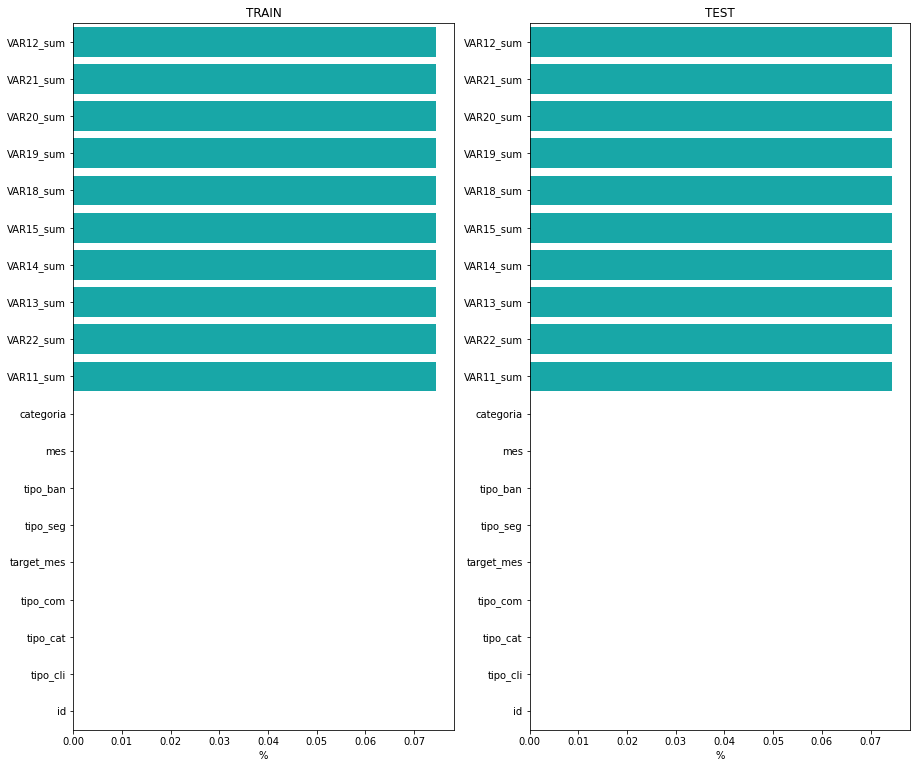

In [12]:
df_missing_values = utils.dataframe_missing_values(train_copy)
df_missing_values_test = utils.dataframe_missing_values(train_copy)

plt.figure(figsize=(15,13))

plt.subplot(1, 2, 1)
plt.title('TRAIN')
sns.barplot(x=df_missing_values['%'], 
            y=df_missing_values.index,
            color='c', 
            order=df_missing_values.index[::-1]
           )

plt.subplot(1, 2, 2)
plt.title('TEST')
sns.barplot(x=df_missing_values_test['%'], 
            y=df_missing_values_test.index, 
            color='c', 
            order=df_missing_values_test.index[::-1])

<AxesSubplot:>

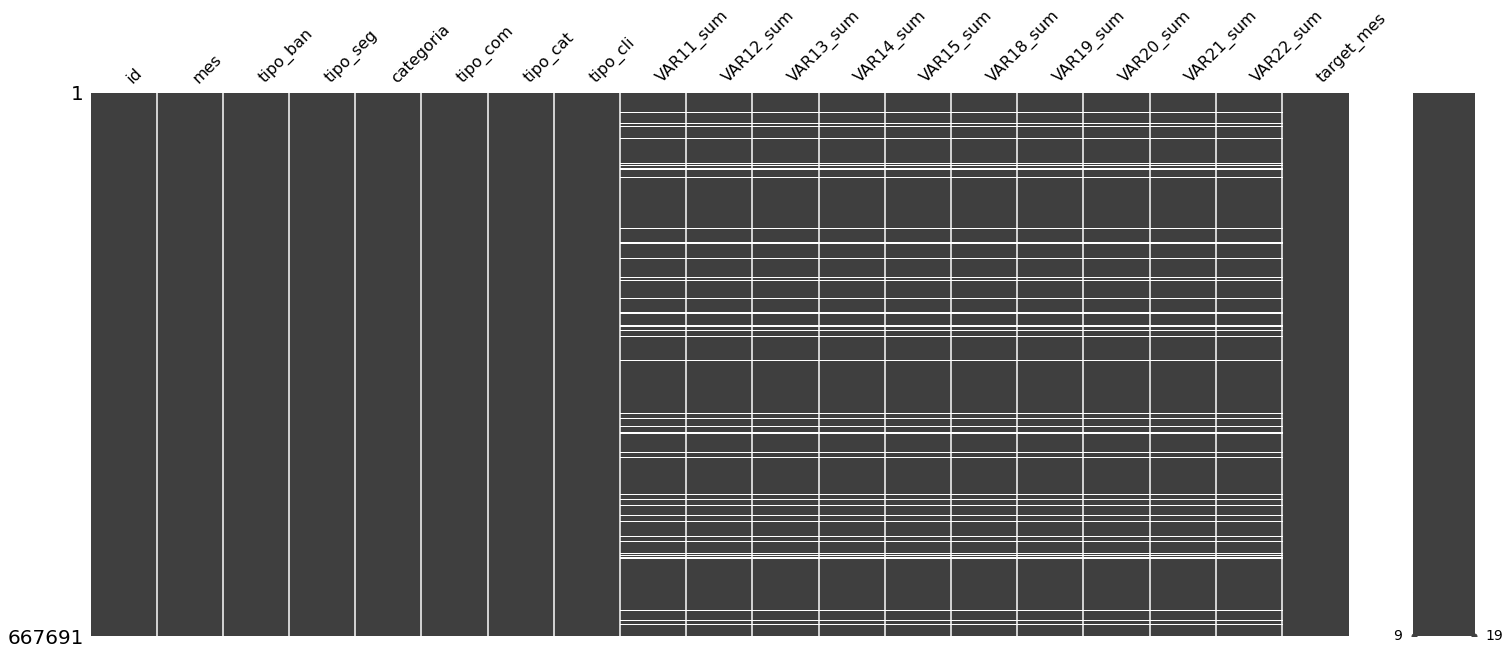

In [13]:
msno.matrix(train_copy)

In [14]:
train_copy.describe()

,mes,VAR11_sum,VAR12_sum,VAR13_sum,VAR14_sum,VAR15_sum,VAR18_sum,VAR19_sum,VAR20_sum,VAR21_sum,VAR22_sum,target_mes
count,667691.000000,6.179930e+05,6.179930e+05,6.179930e+05,6.179930e+05,6.179930e+05,6.179930e+05,617993.000000,617993.000000,6.179930e+05,6.179930e+05,667691.000000
mean,201975.788959,1.260595e+08,7.872785e+07,1.240690e+08,3.186194e+05,6.058867e+05,4.608448e+01,0.001743,0.017084,1.051513e+04,2.872212e+05,182.383308
std,74.658239,6.226922e+08,4.484223e+08,6.226304e+08,3.024396e+06,3.677109e+06,1.187768e+04,0.648322,9.104270,8.545224e+05,1.942102e+06,986.394827
min,201812.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,201907.000000,2.006690e+05,0.000000e+00,5.481900e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,8.580000
50%,202003.000000,1.054624e+07,0.000000e+00,9.272466e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,25.500000
75%,202010.000000,6.518084e+07,3.141552e+07,6.038835e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,85.140000
max,202109.000000,3.811678e+10,2.410679e+10,3.811678e+10,1.547436e+08,1.547436e+08,6.084460e+06,375.000000,6999.000000,3.917386e+08,1.038690e+08,69430.190000


In [15]:
train_copy.head()

,id,mes,tipo_ban,tipo_seg,categoria,tipo_com,tipo_cat,tipo_cli,VAR11_sum,VAR12_sum,VAR13_sum,VAR14_sum,VAR15_sum,VAR18_sum,VAR19_sum,VAR20_sum,VAR21_sum,VAR22_sum,target_mes
0,abdd0c8d3be5,202002,BAN1,NO PROD3,V5,COM4,RUBRO5,CLI1,30034225.0,29202006.0,30034225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,5b290c34ff68,202006,BAN1,PROD1,V2,COM2,RUBRO5,CLI1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.19
2,54b8678ab09b,201901,BAN1,PROD1/PROD2,V4,COM3,RUBRO3,CLI1,98591062.0,0.0,98591062.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.78
3,77e1b37ea594,202004,BAN1,NO PROD3,V6,COM4,RUBRO2,CLI1,136616628.0,121330008.0,136616628.0,0.0,0.0,0.0,0.0,0.0,4722.0,0.0,55.06
4,7b6c7a3b57a9,202101,BAN1,PROD1,V2,COM2,RUBRO4,CLI2,46322629.0,28534803.0,28534803.0,0.0,6481373.0,0.0,0.0,0.0,0.0,6481373.0,0.19


## Categorical features

BAN1    556222
BAN3     61653
BAN2     48774
BAN4      1042
Name: tipo_ban, dtype: int64


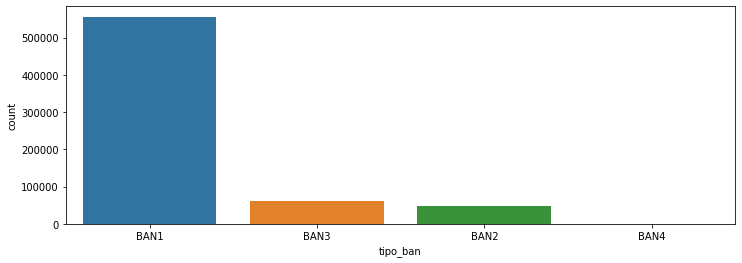

PROD1          150501
NO PROD3       126653
PROD1/PROD2     88515
PROD1/PROD4     75525
MULTIPROD       64957
SINPROD         62584
PROD4           29211
PROD1/PROD3     17074
NO PROD2        16221
NO PROD4        13682
PROD3/PROD4      7716
PROD3            5618
PROD2            3929
PROD2/PROD4      3788
NO PROD1         1470
PROD3/PROD2       247
Name: tipo_seg, dtype: int64


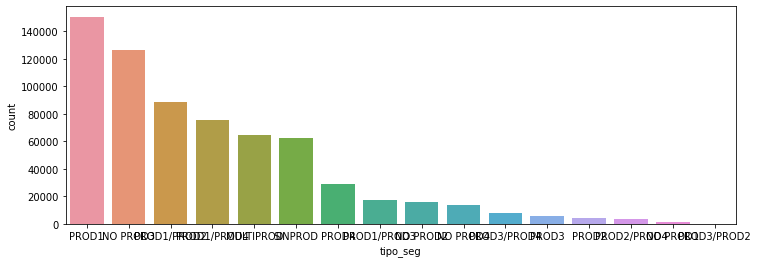

V2    328005
V4    144671
V6     92962
V5     51197
V3     49553
V1      1303
Name: categoria, dtype: int64


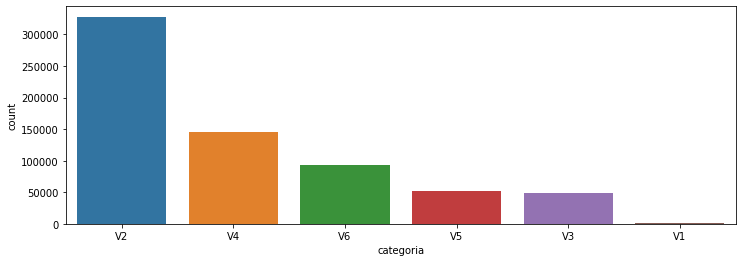

COM3    192865
COM2    189259
COM4    158026
COM5     64957
COM1     62584
Name: tipo_com, dtype: int64


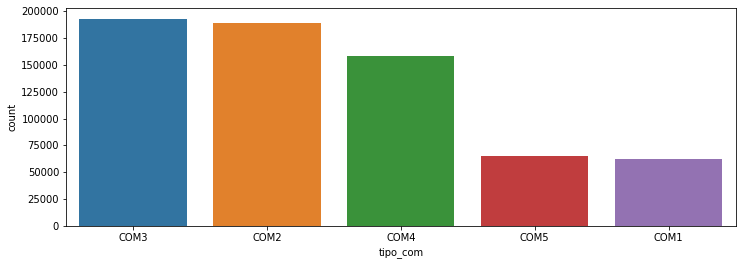

RUBRO3     153416
RUBRO4      91414
RUBRO5      84513
RUBRO6      69312
RUBRO1      62794
RUBRO7      41518
RUBRO8      40963
RUBRO2      23767
RUBRO12     19428
RUBRO9      15432
RUBRO13     14769
RUBRO14     10460
RUBRO10     10347
RUBRO17      9865
RUBRO15      6346
RUBRO16      4528
RUBRO19      4156
RUBRO18      1758
RUBRO11      1712
RUBRO20       899
RUBRO21       294
Name: tipo_cat, dtype: int64


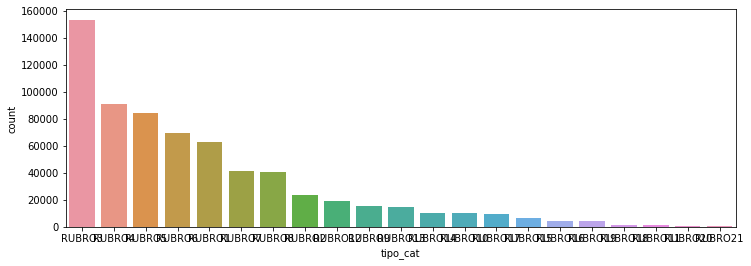

CLI1    584175
CLI2     83516
Name: tipo_cli, dtype: int64


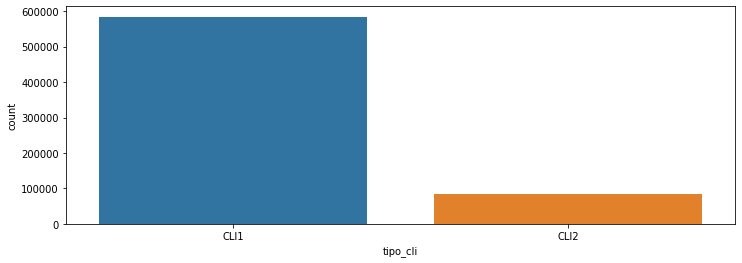

In [16]:
categorical_columns = train_copy.drop(['id','mes'], axis=1).select_dtypes('object').columns

for column in categorical_columns:
    value_counts = train_copy[column].value_counts()
    print(value_counts)
    plt.figure(figsize=(12,4))
    sns.countplot(x=train_copy[column], order=value_counts.index)    
    plt.show()
    print('============================================================================')
    print('============================================================================')

BAN1    251831
BAN3     22324
BAN2     17690
BAN4       171
Name: tipo_ban, dtype: int64


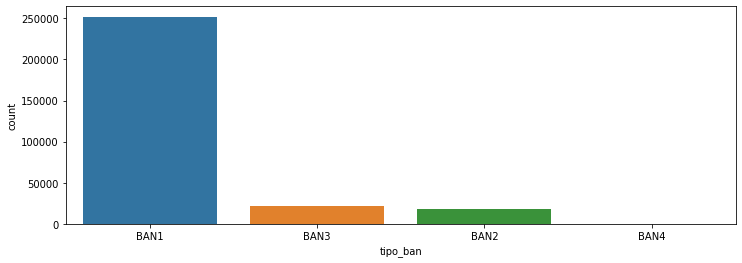

PROD1          66265
NO PROD3       58489
PROD1/PROD2    38128
PROD1/PROD4    35807
MULTIPROD      31416
SINPROD        21929
PROD4           9584
PROD1/PROD3     8102
NO PROD2        7963
NO PROD4        5996
PROD3/PROD4     2617
PROD3           2476
PROD2           1477
PROD2/PROD4     1056
NO PROD1         520
PROD3/PROD2      191
Name: tipo_seg, dtype: int64


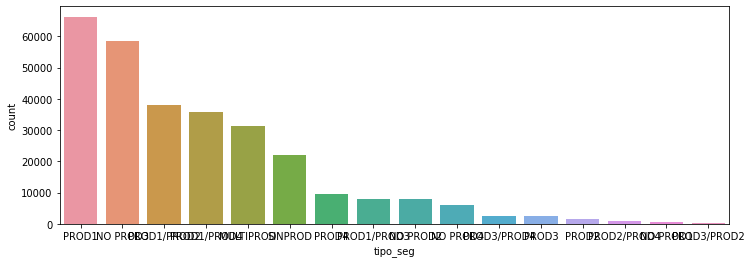

V2    138301
V4     68508
V6     36676
V5     24234
V3     24032
V1       265
Name: categoria, dtype: int64


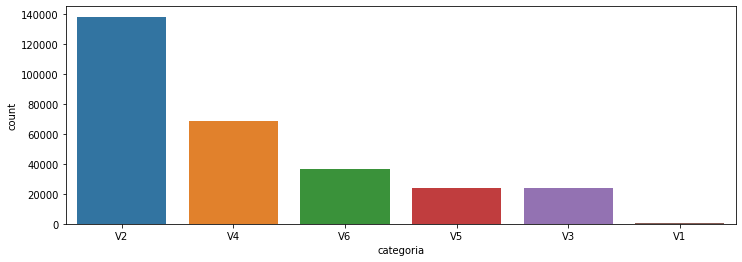

COM3    85901
COM2    79802
COM4    72968
COM5    31416
COM1    21929
Name: tipo_com, dtype: int64


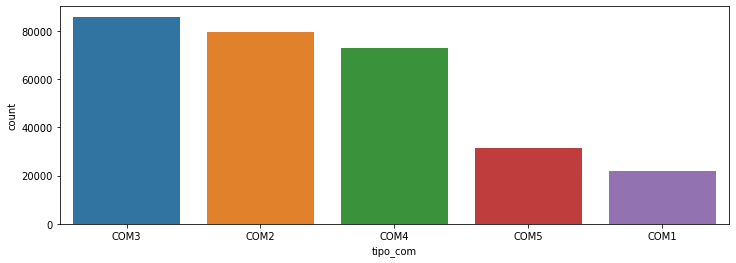

RUBRO3     67981
RUBRO4     39239
RUBRO5     39097
RUBRO6     30160
RUBRO1     26267
RUBRO7     17777
RUBRO8     17259
RUBRO2     10997
RUBRO12     8044
RUBRO13     6547
RUBRO9      5937
RUBRO10     5171
RUBRO17     4688
RUBRO14     4311
RUBRO15     2618
RUBRO16     2057
RUBRO19     1503
RUBRO18      975
RUBRO11      876
RUBRO20      399
RUBRO21      113
Name: tipo_cat, dtype: int64


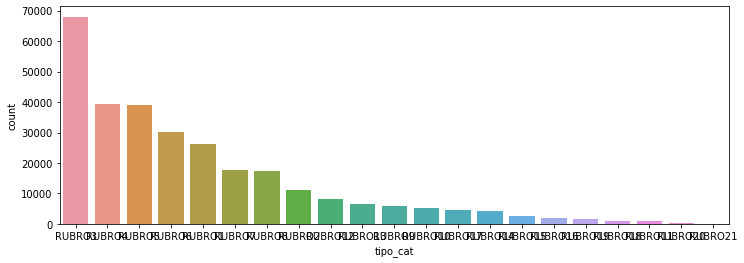

CLI1    256041
CLI2     35975
Name: tipo_cli, dtype: int64


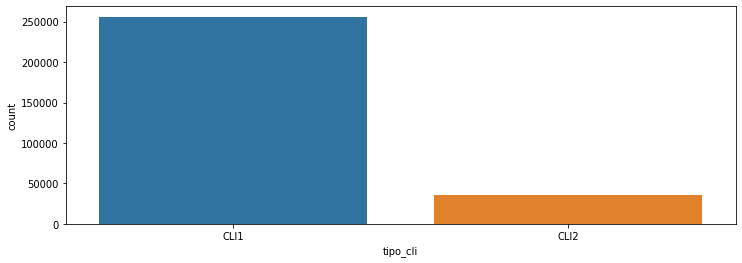

In [17]:
categorical_columns_test = test.drop(['id','mes'], axis=1).select_dtypes('object').columns

for column in categorical_columns_test:
    value_counts = test[column].value_counts()
    print(value_counts)
    plt.figure(figsize=(12,4))
    sns.countplot(x=test[column], order=value_counts.index)    
    plt.show()
    print('============================================================================')
    print('============================================================================')

## Correlations

<AxesSubplot:>

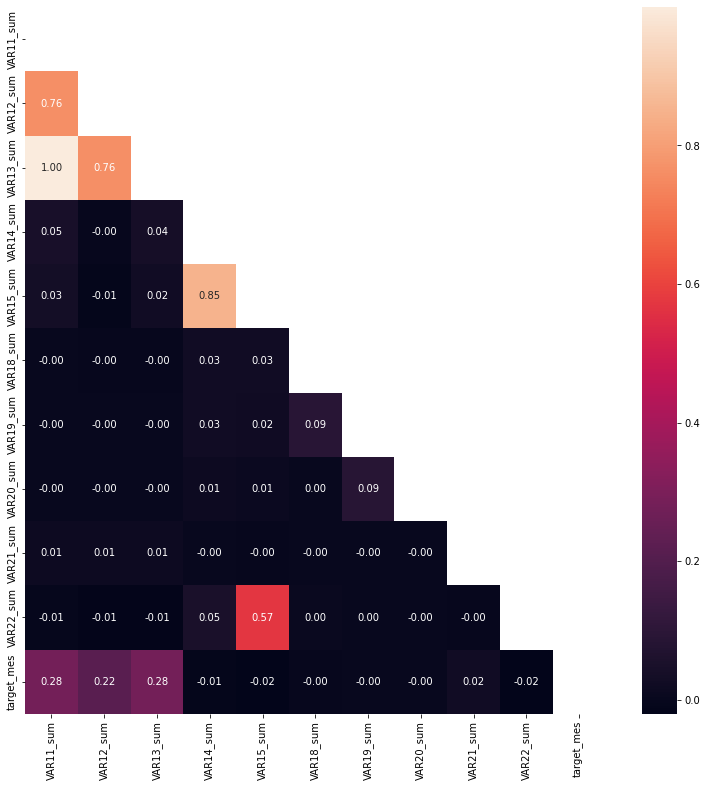

In [18]:
mask = np.triu((np.ones_like(train_copy.select_dtypes('float64').corr())))
plt.figure(figsize=(13,13))
sns.heatmap(train_copy.select_dtypes('float64').corr(), mask=mask, annot=True, fmt='.2f')

## Target

<AxesSubplot:xlabel='mes', ylabel='target_mes'>

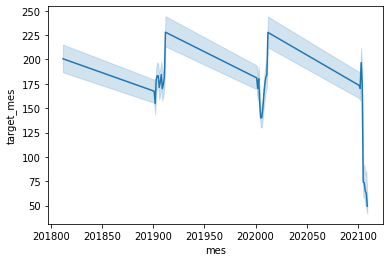

In [104]:
sns.lineplot(x=train_copy.mes, y=train_copy.target_mes)

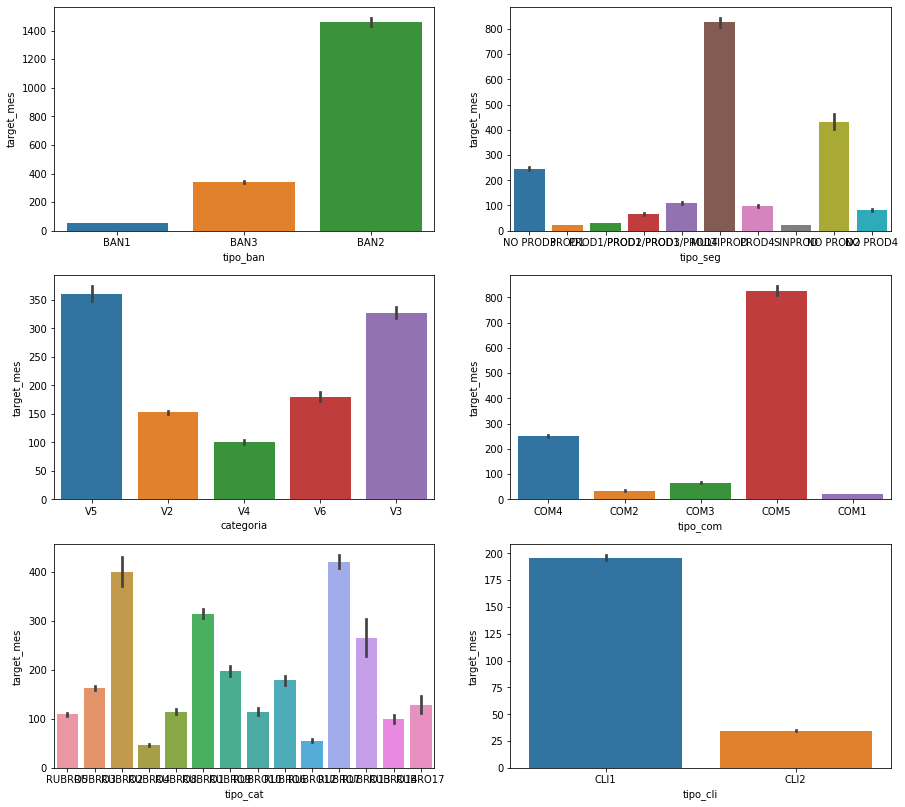

In [26]:
fig, axis = plt.subplots(3, 2, figsize=(15, 14))
plt.subplots_adjust(hspace=.2)
for column, ax in zip(categorical_columns, axis.flatten()):
    sns.barplot(x=train_copy[column], y=train_copy.target_mes, ax=ax)

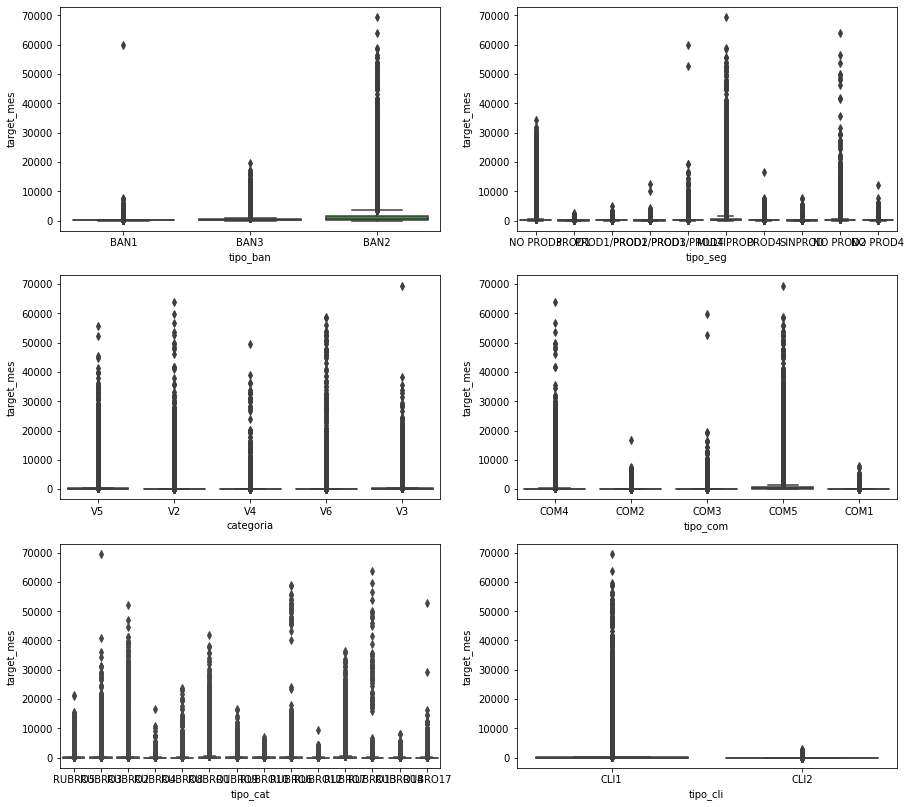

In [27]:
fig, axis = plt.subplots(3, 2, figsize=(15, 14))
plt.subplots_adjust(hspace=.2)
for column, ax in zip(categorical_columns, axis.flatten()):
    sns.boxplot(x=train_copy[column], y=train_copy.target_mes, ax=ax)